In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
table_path = "../data/data_num_325_fea_30_rf.csv"
#table_path = "../data/data_num_325_fea_291.xlsx"
data = pd.read_csv(table_path,index_col = 0)

label = data["Product_RON_loss"]
X = data.drop("Product_RON_loss",1)
X.head()

,S-ZORB.DT_2001.DACA,S-ZORB.AT_5201.PV,S-ZORB.FC_1203.PV,S-ZORB.PDT_1003.DACA,S-ZORB.FT_9301.PV,S-ZORB.TE_1107.DACA,S-ZORB.TC_2101.PV,S-ZORB.LT_3801.DACA,S-ZORB.PDT_3502.DACA,S-ZORB.LC_5101.PV,...,S-ZORB.LC_3301.DACA,Raw_RON,S-ZORB.LI_2107.DACA,Recycle_S,S-ZORB.LT_9101.DACA,S-ZORB.LC_1203.DACA,S-ZORB.TC_5005.PV,S-ZORB.PDT_2605.DACA,S-ZORB.TE_1608.PV,S-ZORB.SIS_TE_2802
0,93.428016,-0.110001,11.876378,0.615028,1458.339950,120.779735,240.088445,1.246513,9.308272,49.916519,...,49.996662,90.6,4.657179,5.98,-1.798679,39.998761,129.841715,0.118129,448.457150,273.237180
1,94.420340,0.241799,11.419075,0.617141,1142.179200,121.358590,239.809820,0.992477,10.611206,49.955209,...,50.501584,90.5,4.728827,4.38,0.578173,39.954376,129.844145,0.211532,443.138010,282.043645
2,94.729605,-0.040036,11.572593,0.622869,1025.874790,120.472435,239.742695,1.089546,9.457125,50.215176,...,50.014960,90.7,4.687084,5.82,-0.486859,39.960575,129.636925,0.331018,437.632450,274.166670
3,96.880335,-0.199544,11.734053,0.629283,967.852340,123.650450,239.732465,1.364642,10.058440,49.877925,...,50.032104,90.4,5.381088,4.67,-0.697793,40.032423,130.942725,0.149623,434.962770,270.070205
4,97.991173,-0.187086,11.673913,7.598486,932.608515,122.847625,239.835635,1.034412,10.181999,49.900563,...,50.014087,89.6,5.633956,4.52,-0.370695,40.991349,130.758655,-0.025154,429.323425,268.022000


In [2]:
data

,S-ZORB.DT_2001.DACA,S-ZORB.AT_5201.PV,S-ZORB.FC_1203.PV,S-ZORB.PDT_1003.DACA,S-ZORB.FT_9301.PV,S-ZORB.TE_1107.DACA,S-ZORB.TC_2101.PV,S-ZORB.LT_3801.DACA,S-ZORB.PDT_3502.DACA,S-ZORB.LC_5101.PV,...,Raw_RON,S-ZORB.LI_2107.DACA,Recycle_S,S-ZORB.LT_9101.DACA,S-ZORB.LC_1203.DACA,S-ZORB.TC_5005.PV,S-ZORB.PDT_2605.DACA,S-ZORB.TE_1608.PV,S-ZORB.SIS_TE_2802,Product_RON_loss
0,93.428016,-0.110001,11.876378,0.615028,1458.339950,120.779735,240.088445,1.246513,9.308272,49.916519,...,90.6,4.657179,5.98,-1.798679,39.998761,129.841715,0.118129,448.457150,273.237180,1.38
1,94.420340,0.241799,11.419075,0.617141,1142.179200,121.358590,239.809820,0.992477,10.611206,49.955209,...,90.5,4.728827,4.38,0.578173,39.954376,129.844145,0.211532,443.138010,282.043645,1.18
2,94.729605,-0.040036,11.572593,0.622869,1025.874790,120.472435,239.742695,1.089546,9.457125,50.215176,...,90.7,4.687084,5.82,-0.486859,39.960575,129.636925,0.331018,437.632450,274.166670,1.38
3,96.880335,-0.199544,11.734053,0.629283,967.852340,123.650450,239.732465,1.364642,10.058440,49.877925,...,90.4,5.381088,4.67,-0.697793,40.032423,130.942725,0.149623,434.962770,270.070205,1.38
4,97.991173,-0.187086,11.673913,7.598486,932.608515,122.847625,239.835635,1.034412,10.181999,49.900563,...,89.6,5.633956,4.52,-0.370695,40.991349,130.758655,-0.025154,429.323425,268.022000,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,47.000323,1.560697,10.381811,9.632140,1963.308525,124.334542,244.986360,0.025413,10.128979,598.017788,...,89.2,3.613148,6.08,2.216257,40.011747,129.157865,0.288261,428.109275,281.829207,1.15
321,48.510221,2.037648,9.995659,9.607235,1974.646925,123.030560,244.937650,0.077742,10.937725,568.550955,...,89.2,3.768741,6.08,3.306614,40.011747,128.702355,10.671572,433.043040,278.364843,1.25
322,48.867726,0.803333,10.195086,9.574362,1788.499125,122.736107,245.025612,-0.014480,11.383706,626.531005,...,89.4,3.746757,7.41,-4.016465,40.011747,129.190320,13.136913,429.142465,281.358248,1.35
323,50.020782,0.773961,10.412704,9.433388,1977.315600,123.123952,244.818115,-0.094022,10.585208,629.323360,...,89.4,3.732633,6.97,-4.021979,40.011747,128.461002,0.288261,429.284925,274.248608,1.28


In [3]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.describe()

,S-ZORB.DT_2001.DACA,S-ZORB.AT_5201.PV,S-ZORB.FC_1203.PV,S-ZORB.PDT_1003.DACA,S-ZORB.FT_9301.PV,S-ZORB.TE_1107.DACA,S-ZORB.TC_2101.PV,S-ZORB.LT_3801.DACA,S-ZORB.PDT_3502.DACA,S-ZORB.LC_5101.PV,...,S-ZORB.LC_3301.DACA,Raw_RON,S-ZORB.LI_2107.DACA,Recycle_S,S-ZORB.LT_9101.DACA,S-ZORB.LC_1203.DACA,S-ZORB.TC_5005.PV,S-ZORB.PDT_2605.DACA,S-ZORB.TE_1608.PV,S-ZORB.SIS_TE_2802
count,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,...,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02
mean,-3.060799e-16,1.311771e-16,5.902970e-16,-8.745141e-17,-8.745141e-17,9.182398e-16,-3.935314e-16,4.372571e-17,9.182398e-16,-1.749028e-16,...,-1.641627e-14,3.662028e-15,-3.060799e-16,-2.896828e-16,-2.186285e-17,5.159633e-15,-5.006593e-15,8.745141e-17,-1.268045e-15,-1.399223e-15
std,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,...,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00,1.001542e+00
min,-2.175326e+00,-9.072120e-01,-3.384315e+00,-1.713895e+00,-1.806437e+00,-3.028300e+00,-2.752336e+00,-1.372085e+00,-2.189304e+00,-1.023929e+00,...,-3.454061e+00,-2.851818e+00,-2.159671e+00,-2.648821e+00,-8.817272e-01,-1.662720e+00,-3.192399e+00,-6.118635e-01,-2.605185e+00,-2.577780e+00
25%,-2.927317e-01,-8.225720e-01,-5.283364e-01,-1.257344e+00,-7.207415e-01,-4.108629e-01,-5.195503e-01,-8.955774e-01,-7.162139e-01,-1.006446e+00,...,-4.241813e-01,-6.005649e-01,-3.304415e-01,-5.779639e-01,-8.784663e-01,-3.801840e-01,-6.159388e-01,-5.219688e-01,-7.011365e-01,-7.751246e-01
50%,-4.500597e-02,-3.199173e-01,7.337252e-02,6.696369e-01,-1.038972e-01,2.524228e-01,-3.969512e-01,7.657633e-05,4.848218e-02,7.123648e-01,...,-1.055103e-02,7.481086e-02,9.372543e-02,1.289152e-01,-3.741373e-01,-2.740728e-01,9.273412e-02,-4.817257e-01,-2.158521e-02,-4.572261e-02
75%,7.892329e-01,5.782623e-01,7.116164e-01,8.173869e-01,6.290493e-01,6.715549e-01,1.252208e+00,6.586867e-01,6.483724e-01,9.973836e-01,...,3.819105e-01,6.376240e-01,8.496485e-01,6.008316e-01,6.685364e-01,-2.192938e-01,7.513117e-01,1.204437e-01,8.454792e-01,5.591213e-01
max,1.573496e+00,3.548729e+00,1.927735e+00,1.396734e+00,3.020570e+00,1.684044e+00,2.173202e+00,1.916428e+00,2.349629e+00,1.516625e+00,...,3.518449e+00,2.213501e+00,1.215429e+00,2.846915e+00,3.085666e+00,3.017158e+00,1.929624e+00,4.144772e+00,2.316973e+00,3.068591e+00


In [4]:
# X = data_test.drop('')

In [5]:
label

0      1.38
1      1.18
2      1.38
3      1.38
4      1.28
       ... 
320    1.15
321    1.25
322    1.35
323    1.28
324    1.25
Name: Product_RON_loss, Length: 325, dtype: float64

In [6]:
# Split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.2, random_state = 45)

/home/yuxinc/.conda/envs/tf22_py38/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yuxinc/.conda/envs/tf22_py38/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yuxinc/.conda/envs/tf22_py38/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

,R_Square_Score,Mean_Squared_Error,Mean_Absolute_Error
RandomForest,0.173052,0.042579,0.147569
Bayesian Ridge,0.132768,0.043468,0.152155
Hubber,0.098163,0.044922,0.153854
SVM Linear,0.096545,0.045349,0.155559
AdaBoost,0.083364,0.045497,0.154006
Bagging,0.076699,0.045602,0.153326
Ridge,0.077907,0.046089,0.157251
Lasso,0.076645,0.046142,0.157367
Linear,0.074968,0.046230,0.157542
SVM RBF,-0.028765,0.050932,0.162269


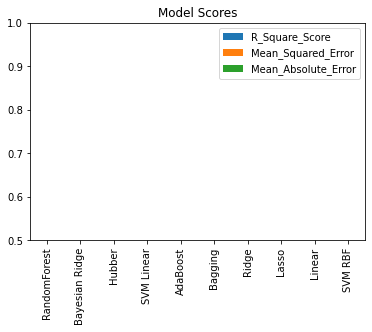

In [7]:
#Try common machine learning regressor
# R2 Score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import GridSearchCV
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        
        mse = make_scorer(mean_squared_error)
        mse_score = cross_val_score(clf, train, labels, cv=cv,scoring=mse)
#         scores=[r2_val_score.mean(),mse_score.mean()]
        
        mae = make_scorer(mean_absolute_error)
        mae_score = cross_val_score(clf, train, labels, cv=cv,scoring=mae)
        scores=[r2_val_score.mean(),mse_score.mean(), mae_score.mean()]
        
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R_Square_Score","Mean_Squared_Error", "Mean_Absolute_Error"] 
    results=results.sort_values(by=["Mean_Squared_Error"],ascending=True)
    
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(X,label)